In [1]:
# Authore: krishna yadav
# Date: 09-02-2021

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# %matplotlib inline will make your plot outputs appear and be stored within the notebook.
# %matplotlib notebook provides the better visualization than %matplotlib inline.
# If you tried %matplotlib inline first and then switch to %matplotlib notebook, you might get empty result. Restart the kernel and run again.

import warnings
warnings.filterwarnings('ignore')

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso


In [3]:
# Load/read the dataframe
path = '../data/example_work_orders.csv'
df = pd.read_csv(path)

In [4]:
#Check the data
df.head()

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580


In [5]:
#Check the Coloumns and daaatatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JOB_ID       5000 non-null   object 
 1   JOB_TYPE     5000 non-null   object 
 2   DEPTH_M      5000 non-null   float64
 3   DIAMETER_MM  5000 non-null   int64  
 4   MATERIAL     5000 non-null   object 
 5   LENGTH_M     5000 non-null   float64
 6   JOB_COST     4994 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 273.6+ KB


In [6]:
#Check the Rows and Coloumns
df.shape

(5000, 7)

In [7]:
#Check describe data
df.describe()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
count,5000.000000,5000.000000,5000.000000,4994.000000
mean,2.670232,733.001000,25.137914,10207.698215
std,0.853085,24486.875116,9.097207,9534.848466
min,-4.660000,50.000000,8.160000,586.506169
25%,2.000000,63.000000,17.810000,3978.863093
50%,2.570000,90.000000,23.785000,6986.901196
75%,3.270000,200.000000,31.665000,12884.617365
max,4.980000,999999.000000,49.710000,85860.133000


In [8]:
#Check the missing values percentage in features
percent = (df.isnull().sum()/df.isnull().count())
print(percent)

JOB_ID         0.0000
JOB_TYPE       0.0000
DEPTH_M        0.0000
DIAMETER_MM    0.0000
MATERIAL       0.0000
LENGTH_M       0.0000
JOB_COST       0.0012
dtype: float64


In [9]:
#dropping features having missing values more than 60%
df = df.drop((percent[percent > 0.6]).index,axis= 1)  

# checking null values after drop
print(df.isnull().sum())
df.apply(lambda row: row.astype(str).str.contains('unknown').sum())

JOB_ID         0
JOB_TYPE       0
DEPTH_M        0
DIAMETER_MM    0
MATERIAL       0
LENGTH_M       0
JOB_COST       6
dtype: int64


JOB_ID         0
JOB_TYPE       0
DEPTH_M        0
DIAMETER_MM    0
MATERIAL       0
LENGTH_M       0
JOB_COST       0
dtype: int64

# EDA:

In [10]:
# IDENTIFYING NUMERICAL FEATURES
numeric_data = df.select_dtypes(include=np.number)                                         # select_dtypes selects data with numeric features

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

numeric_col = numeric_data.columns                                                                # we will store the numeric features in a variable
print(numeric_col)
print("===="*20)

Numeric Features:
   DEPTH_M  DIAMETER_MM  LENGTH_M      JOB_COST
0     2.19          200     31.55  19847.644300
1     2.27           63     15.14   4476.588985
2     3.64          450     15.17  16871.484850
3     2.28          200     15.64  11158.144200
4     2.40          200     39.23  16913.611580
Index(['DEPTH_M', 'DIAMETER_MM', 'LENGTH_M', 'JOB_COST'], dtype='object')


In [11]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = df.select_dtypes(exclude=np.number)                                   # we will exclude data with numeric features

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

categorical_col = categorical_data.columns                                                      # we will store the categorical features in a variable
print(categorical_col)
print("===="*20)

Categorical Features:
  JOB_ID JOB_TYPE MATERIAL
0  Job 1  Replace       ST
1  Job 2  Replace       AC
2  Job 3   Repair       ST
3  Job 4  Replace       AC
4  Job 5  Replace       ST
Index(['JOB_ID', 'JOB_TYPE', 'MATERIAL'], dtype='object')


In [12]:
df['JOB_ID'].unique()

array(['Job 1', 'Job 2', 'Job 3', ..., 'Job 4998', 'Job 4999', 'Job 5000'],
      dtype=object)

In [13]:
df['JOB_TYPE'].unique()

array(['Replace', 'Repair'], dtype=object)

In [14]:
df['MATERIAL'].unique()

array(['ST', 'AC', 'CI'], dtype=object)

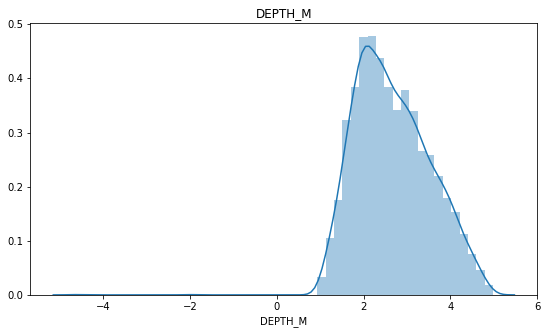

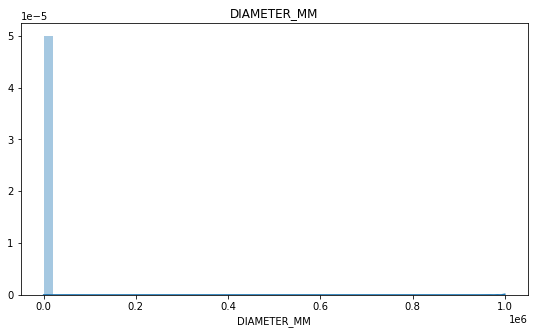

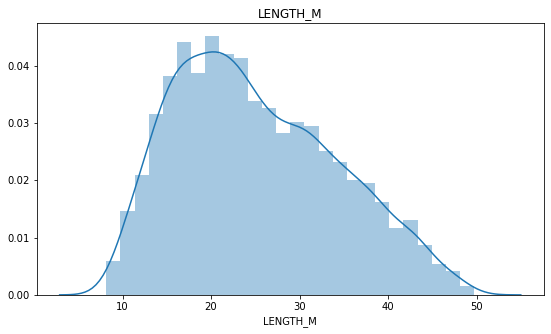

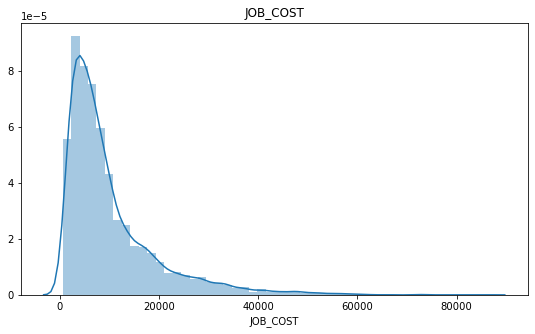

In [15]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)                    
    sns.distplot(df[column])
    plt.title(column)

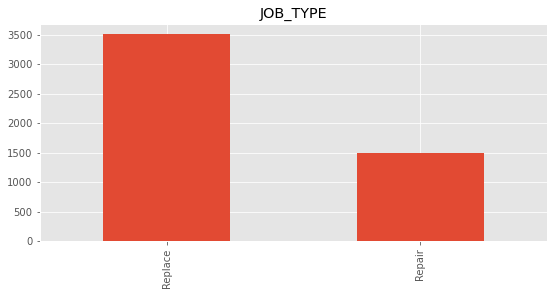

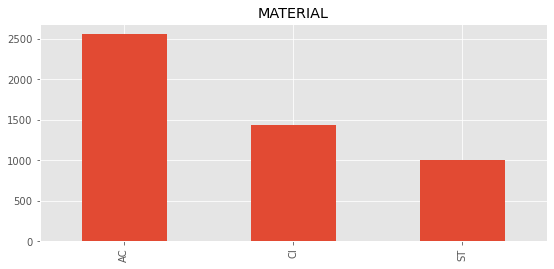

In [16]:
#EDA-Univariate:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Selecting the categorical columns
#Copy the dataset
dfc= df.copy()
dfc.drop(['JOB_ID'],1,inplace=True)
categorical_col = dfc.select_dtypes(include=['object']).columns

plt.style.use('ggplot')

# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dfc[column].value_counts().plot(kind='bar')
    plt.title(column)

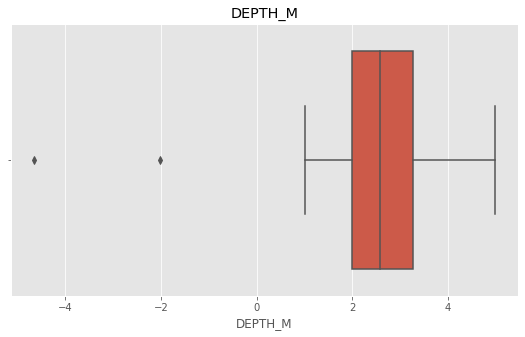

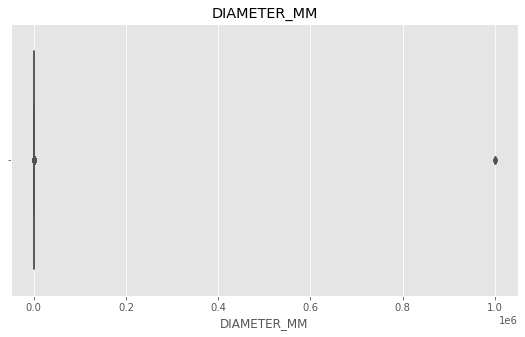

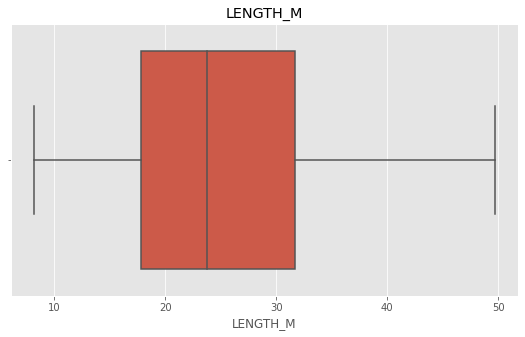

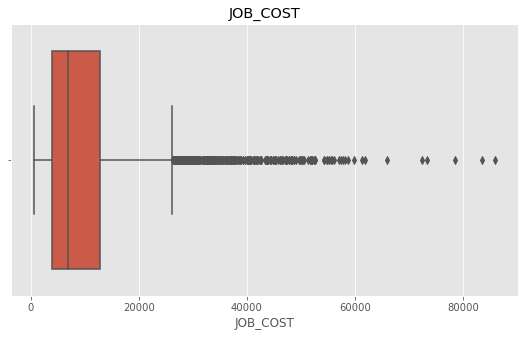

In [17]:
#Checking the outlayers
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(df[column])
    plt.title(column)

In [18]:
#Checking the corelation
df.corr()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
DEPTH_M,1.000000,0.010365,0.001742,0.336630
DIAMETER_MM,0.010365,1.000000,-0.007677,-0.007203
LENGTH_M,0.001742,-0.007677,1.000000,0.180114
JOB_COST,0.336630,-0.007203,0.180114,1.000000


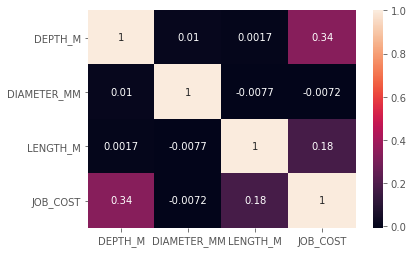

In [19]:
#Check the heatmap
sns.heatmap(df.corr(),annot=True)

# FeatureEngineering

In [20]:
#Copy the dataset
df1= df.copy()
df1.head()

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580


In [21]:
# imputing missing values with mean
for column in numeric_col:
    mean = df1[column].mean()
    df1[column].fillna(mean,inplace = True)
    
# checking null values after imputing with mean or median
print(df1.isnull().sum())

JOB_ID         0
JOB_TYPE       0
DEPTH_M        0
DIAMETER_MM    0
MATERIAL       0
LENGTH_M       0
JOB_COST       0
dtype: int64


In [22]:
# Outlier detection :::::::::::::::::::::::::::::::::::::::::::::::::::::::
cols = list(df1)                                                         

outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])               

for column in numeric_col:                                                      
            
        # first quartile (Q1)
        q1 = df1[column].quantile(0.25) 
            
        # third quartile (Q3)
        q3 = df1[column].quantile(0.75)
            
        # IQR - Inter Quartile range --50% of data set 
        iqr = q3 - q1
        
        # fence_low & fence_high
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        
        # finding the number of outliers using 'and(|) condition. 
        total_outlier = df1[(df1[column] < fence_low) | (df1[column] > fence_high)].shape[0]
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier},ignore_index=True)
outliers

,Feature,Number of Outliers
0,DEPTH_M,2
1,DIAMETER_MM,122
2,LENGTH_M,0
3,JOB_COST,359


In [23]:
# Winsorize for numerical data::::
for col in numeric_col:    
    df1[col] = winsorize(df1[col], limits=[0.05, 0.1],inclusive=(True, True))

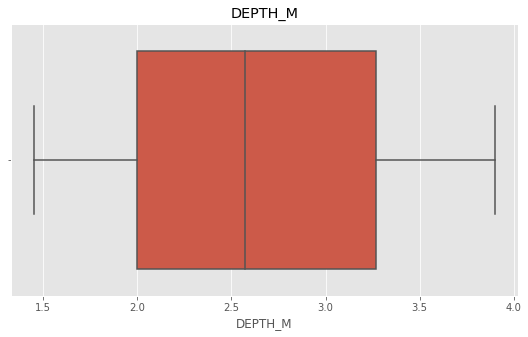

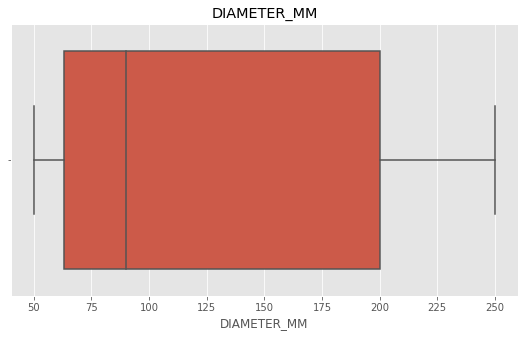

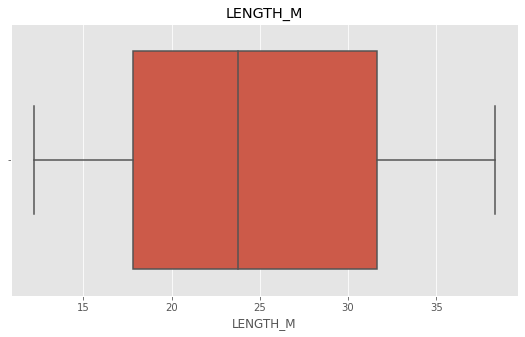

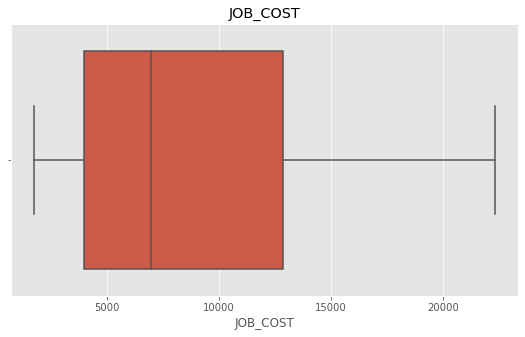

In [24]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(df1[column])
    plt.title(column)

In [25]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = df1[column].mode()[0]
    df1[column] = df1[column].replace('unknown',mode)

In [26]:
# Initializing Label Encoder
# Catagorical data transformed into numerical data (based on dummy varaibale)
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        df1[feature] = le.fit_transform(df1[feature])
    except:
        print('Error encoding '+feature)

In [27]:
#Checking the corelation
df1.corr()

,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
JOB_TYPE,1.000000,-0.019775,0.019752,-0.007126,0.013126,0.475226
DEPTH_M,-0.019775,1.000000,0.012753,0.025333,0.005498,0.339743
DIAMETER_MM,0.019752,0.012753,1.000000,0.008662,0.002588,0.727284
MATERIAL,-0.007126,0.025333,0.008662,1.000000,0.018256,0.020102
LENGTH_M,0.013126,0.005498,0.002588,0.018256,1.000000,0.183884
JOB_COST,0.475226,0.339743,0.727284,0.020102,0.183884,1.000000


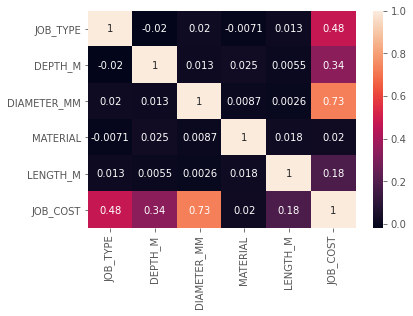

In [28]:
#Check the heatmap
sns.heatmap(df1.corr(),annot=True)

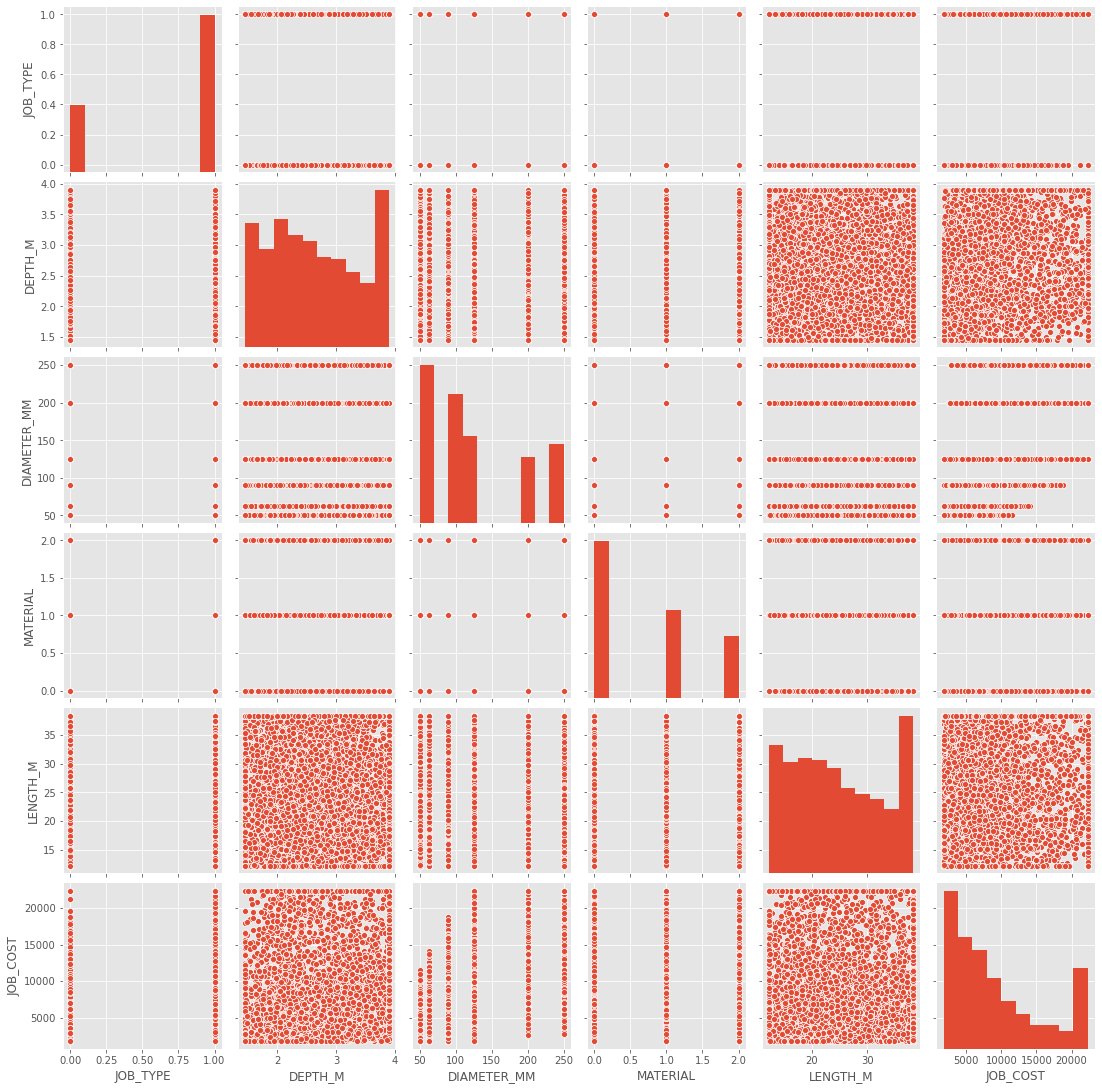

In [29]:
#Checking for pair plot
sns.pairplot(df1)

In [30]:
#Check before process data
df.head()

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580


In [31]:
#Check after process data
df1.head()

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,1,2.19,200,2,31.55,19847.644300
1,Job 2,1,2.27,63,0,15.14,4476.588985
2,Job 3,0,3.64,250,2,15.17,16871.484850
3,Job 4,1,2.28,200,0,15.64,11158.144200
4,Job 5,1,2.40,200,2,38.33,16913.611580


In [32]:
#Drop the ID
df1.drop(['JOB_ID'],1,inplace=True)

In [33]:
df1.head()

,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,1,2.19,200,2,31.55,19847.644300
1,1,2.27,63,0,15.14,4476.588985
2,0,3.64,250,2,15.17,16871.484850
3,1,2.28,200,0,15.64,11158.144200
4,1,2.40,200,2,38.33,16913.611580


In [34]:
# Complete processed data after
# df1.to_csv('../data/preprocessed_data.csv',index=False)

#Copy the dataset
df2= df1.copy()
df2.head()

,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,1,2.19,200,2,31.55,19847.644300
1,1,2.27,63,0,15.14,4476.588985
2,0,3.64,250,2,15.17,16871.484850
3,1,2.28,200,0,15.64,11158.144200
4,1,2.40,200,2,38.33,16913.611580


In [35]:
df2.dtypes

JOB_TYPE         int32
DEPTH_M        float64
DIAMETER_MM      int64
MATERIAL         int32
LENGTH_M       float64
JOB_COST       float64
dtype: object

In [36]:
# Check class value for data ->target value : Repair=0, Replace =1
class_values = (df2['JOB_TYPE'].value_counts()/df2['JOB_TYPE'].value_counts().sum())*100
print(class_values)

1    70.18
0    29.82
Name: JOB_TYPE, dtype: float64


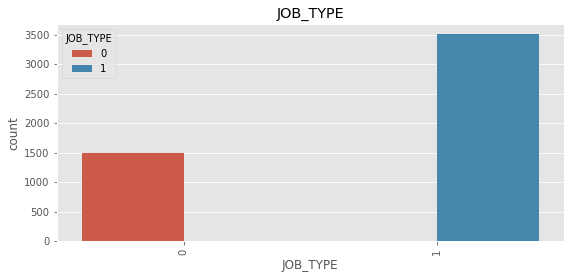

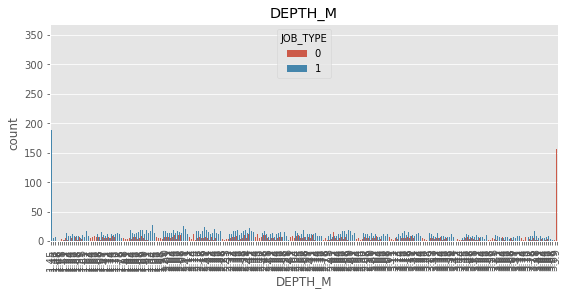

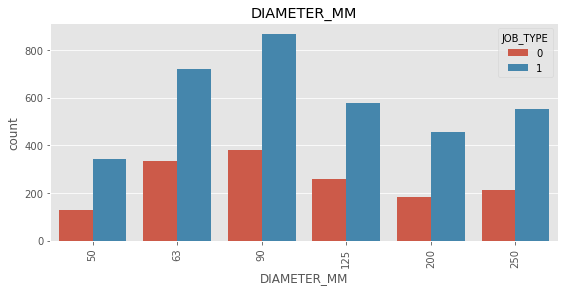

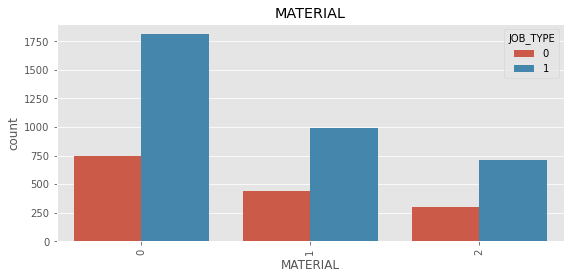

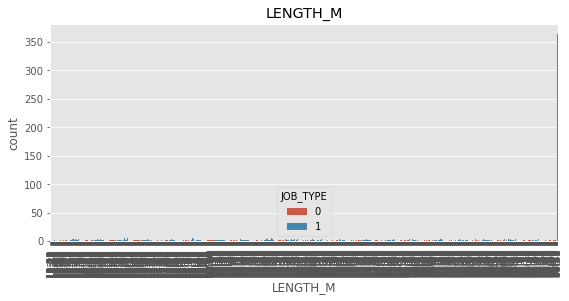

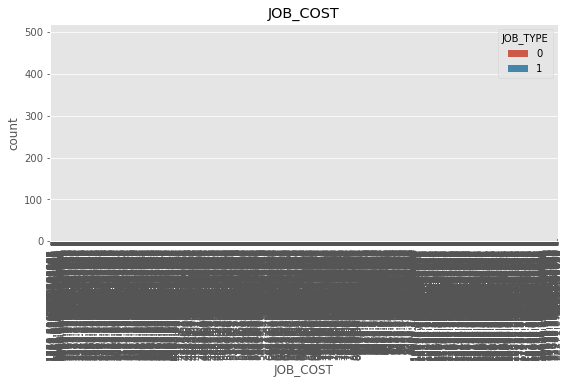

In [37]:
#Check the bivariate 
for column in df2:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df2[column],hue=df2['JOB_TYPE'],data=df2)
    plt.title(column)    
    plt.xticks(rotation=90)

# Split the data set into training set & testing set

In [38]:
## Split data into train and validaton sets 

# Target
y=df2.JOB_TYPE

# # Predictors
X = df2.drop(labels='JOB_TYPE',axis=1)

#Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4000, 5) (4000,)
(1000, 5) (1000,)


# Model Selection 

# model = LogisticRegression()

In [39]:
# Train the ML model on training dataset
# run Logistic Regression model::::::::::::::::::::::::::::;
model = LogisticRegression()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)

ROC_AUC_SCORE is 0.9636135252925412
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       269
           1       0.98      0.99      0.98       731

    accuracy                           0.98      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000

**********************************************************


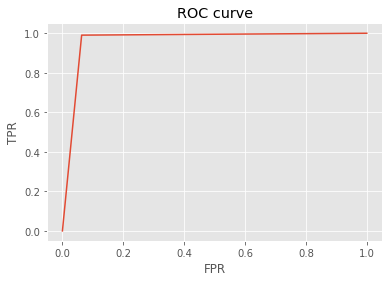

In [40]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
print('**********************************************************')

print('Classification Report:')
print(classification_report(y_val,y_scores))
print('**********************************************************')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])    
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# model = RandomForestClassifier()

ROC_AUC_SCORE is 0.9930558027654738
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       1.00      1.00      1.00       731

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

**********************************************************


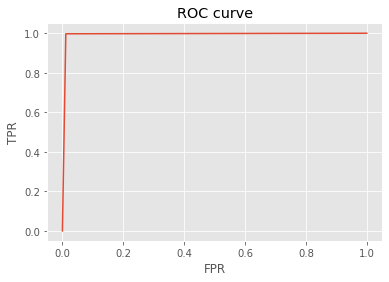

In [41]:
# run Random Forrest Classifier
model = RandomForestClassifier()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)

# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
print('**********************************************************')

print('Classification Report:')
print(classification_report(y_val,y_scores))
print('**********************************************************')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)  
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])   
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# model = Decision Tree Classifier

ROC_AUC_SCORE is 0.9779036711944223
**********************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       269
           1       0.99      0.98      0.98       731

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000

**********************************************************


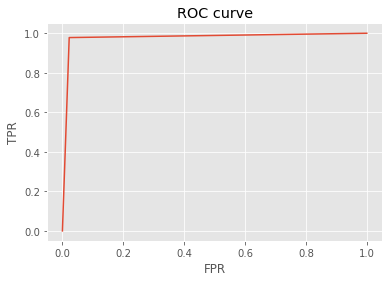

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Run Decision Tree Classifier
model = DecisionTreeClassifier()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)

# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
print('**********************************************************')

print('Classification Report:')
print(classification_report(y_val,y_scores))
print('**********************************************************')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)   
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])   
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# # Random Forrest  classifier model selected based AUC Score

# Selecting best Features : 

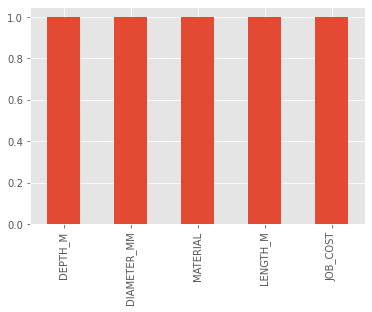

Features  to be selected for Random Forrest Classifier are:
['DEPTH_M', 'DIAMETER_MM', 'MATERIAL', 'LENGTH_M', 'JOB_COST']


In [43]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()

#using  rfe (Recursive Feature Elimination) and selecting 8 features
rfe = RFE(models,8)

#fitting the model
rfe = rfe.fit(X,y)

#ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
feature_ranking.plot(kind='bar')
plt.show()

print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

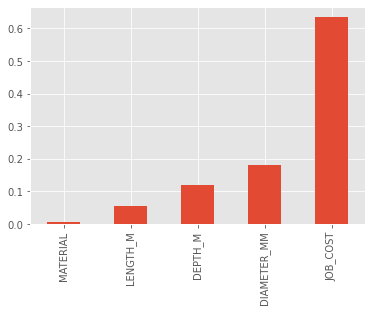

In [44]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# selecting the data
rfc = RandomForestClassifier(random_state=42)

# fitting the data
rfc.fit(X_train, y_train)

# predicting the data
y_pred = rfc.predict(X_test)

# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)

# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

# Selecting best parameters 

In [45]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# selecting the classifier
rfc = RandomForestClassifier()

# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }

# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

# fitting the model
grid_search_model.fit(x_train, y_train)

# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}


# Model Building and Testing: Based on model best score & best parameters 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       416
           1       1.00      0.99      0.99      1084

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

[[ 412    4]
 [   9 1075]]


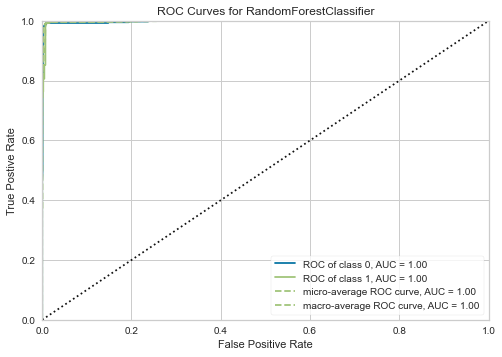

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       416
           1       1.00      0.99      0.99      1084

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

[[ 411    5]
 [   9 1075]]


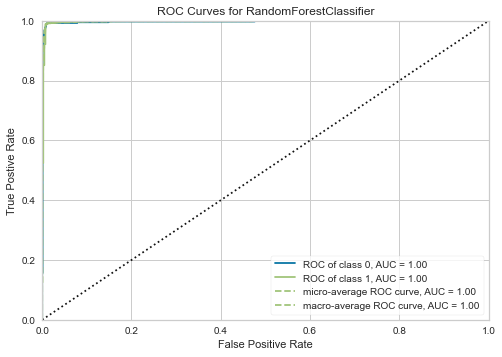

In [47]:
grid_search_random_forrest_best(X[['JOB_COST', 'DIAMETER_MM', 'DEPTH_M', 'LENGTH_M', 'MATERIAL']],y)

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Done My Job -Thank you :)

In [48]:
#Evaluating with single value:
x_val.head()

,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
4857,1.45,63,0,12.19,1751.516880
3437,1.46,50,0,18.00,2404.014454
99,1.45,90,0,15.40,1751.516880
4543,3.90,125,2,23.34,7743.743361
1559,3.37,200,1,21.67,8133.063926


In [49]:
x_val[:1]

,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
4857,1.45,63,0,12.19,1751.51688


In [50]:
# df2.loc[4315]

In [51]:
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    
    y_pred = rfc.predict(x_val)
    print("predicted value for JOB_TYPE:",y_pred[:1])

predicted value for JOB_TYPE: [0]
